# M3 Project

Use Machine Learning to Explore Panel Data

Research Questions:
* What Features impact Life Satisfaction the most?
* How can the Features of the Panel Data be reduced?
* What Clusters of Individuals can be found in the Panel Data?

## 1. Libraries

In [61]:
!pip install scipy=='1.7.1'


ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.7.1 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.7.2, 1.7.3, 1.8.0rc1, 1.8.0rc2, 1.8.0rc3, 1.8.0rc4, 1.8.0, 1.8.1, 1.9.0rc1, 1.9.0rc2, 1.9.0rc3, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0rc1, 1.10.0rc2, 1.10.0, 1.10.1, 1.11.0rc1, 1.11.0rc2, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.11.4)
ERROR: No matching distribution found for scipy==1.7.1


In [62]:
pip install -U scikit-learn

In [63]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

# common visualization module
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
from scipy.stats import entropy


## 2. Data

### 2.1 Load and Prepare Data

In [102]:
#connect to drive
from google.colab import drive
#drive.mount('/content/drive')


#load data
shp_20 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CAS_ADS_M3/Project/data/SHP20_PP.xlsx')


In [103]:
# create different formats of data, xy-split, numpy

df = shp_20[['satLife','sex','age', 'satFinances', 'satJob', 'partner', 'satFreetime', 'satDemocracy', 'negAff', 'posAff', 'womenPenalized', 'ownSexPenalized', 'womenPromotion', 'education', 'workStatus', 'SES', 'incomeYearIndiv', 'incomeYearHouse', 'nrOwnKids']].copy().dropna()

np_df = df.to_numpy().astype(np.float32).copy()
df_columns=df.columns[:19]

df_Y = df[['satLife']].copy()
df_X = df[['sex','age', 'satFinances', 'satJob', 'partner', 'satFreetime', 'satDemocracy', 'negAff', 'posAff', 'womenPenalized', 'ownSexPenalized', 'womenPromotion', 'education', 'workStatus', 'SES', 'incomeYearIndiv', 'incomeYearHouse', 'nrOwnKids']].copy()
df_X_columns=df_X.columns[:18]

np_X = df_X.to_numpy().astype(np.float32).copy()
np_Y = df_Y.to_numpy().astype(np.float32).copy()

print(df_X_columns)


Index(['sex', 'age', 'satFinances', 'satJob', 'partner', 'satFreetime',
       'satDemocracy', 'negAff', 'posAff', 'womenPenalized', 'ownSexPenalized',
       'womenPromotion', 'education', 'workStatus', 'SES', 'incomeYearIndiv',
       'incomeYearHouse', 'nrOwnKids'],
      dtype='object')


### 2.2 Check Descriptives


In [104]:
print(df_X)
print(df_Y)
#print(x)
print(np_X)
print(np_Y)

print(np_X.shape, np_Y.shape)
print(df_columns)

#new descriptives!!

print("\nSummary statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

# Display the counts of each unique value
sex_counts = df['sex'].value_counts()
print("Value counts for each unique value in 'sex':")
print(sex_counts)

# Display the counts of each unique value
partner_counts = df['partner'].value_counts()
print("Value counts for each unique value in 'partner':")
print(partner_counts)

      sex  age  satFinances  satJob  partner  satFreetime  satDemocracy  \
0       0   59            5       5        1            0             8   
1       1   26            3       6        1            5             8   
2       1   47            9       8        1            7             8   
3       1   52            5       8        1            8             8   
4       0   51            7      10        1            6             5   
...   ...  ...          ...     ...      ...          ...           ...   
6013    0   28            6       8        1            5             7   
6014    0   29           10       9        1            9             9   
6015    0   29           10       7        0            4             8   
6016    0   31            8       7        0            7             7   
6017    1   23            7       8        1            5             3   

      negAff  posAff  womenPenalized  ownSexPenalized  womenPromotion  \
0          4       4      

## 3.  What features impact life satsfaction the most?


Scaling --> for later use

In [105]:
#better do scaling
scale = StandardScaler()

np_Xs = scale.fit_transform(np_X).copy()
np_Ys = scale.fit_transform(np_Y).copy()

#non-scaled
x_train, x_test, y_train, y_test = train_test_split(np_X, np_Y, test_size=0.2, random_state = 42)

#scaled
#x_train, x_test, y_train, y_test = train_test_split(np_Xs, np_Ys, test_size=0.2, random_state = 42) #check later, add to other analyses


### 3.1 Random Forest




In [106]:
estimators_range = [10, 50, 100, 200]
depth_range = [3, 5, 10, 20]

train_R2s = []
test_R2s = []
parameters = []

for n_estimators in estimators_range:
    for max_depth in depth_range:

      rfc = ensemble.RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=42) #how many trees should we fit?
      rfc.fit(x_train, y_train)
      y_pred = rfc.predict(x_test)
      train_R2 = rfc.score(x_train, y_train)
      test_R2 = rfc.score(x_test, y_test)
      train_R2s.append(train_R2)
      test_R2s.append(test_R2)
      parameters.append((n_estimators, max_depth))
      print(f"Number of Estimators: {n_estimators}, Max Depth: {max_depth}, \nTraining R2: {train_R2}, Test R2: {test_R2}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 10, Max Depth: 3, 
Training R2: 0.34011070171818025, Test R2: 0.30831828337810396
Number of Estimators: 10, Max Depth: 5, 
Training R2: 0.4463975767520971, Test R2: 0.3509786195013447
Number of Estimators: 10, Max Depth: 10, 
Training R2: 0.7021358463357965, Test R2: 0.3440296875192348


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 10, Max Depth: 20, 
Training R2: 0.8800179093319198, Test R2: 0.3060360530381343


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 50, Max Depth: 3, 
Training R2: 0.3489440044800012, Test R2: 0.31532996327832463


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 50, Max Depth: 5, 
Training R2: 0.4486735122767449, Test R2: 0.3633655753029793


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 50, Max Depth: 10, 
Training R2: 0.7246331127220079, Test R2: 0.3852577819029782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 50, Max Depth: 20, 
Training R2: 0.9064305537594963, Test R2: 0.3747004875526


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 100, Max Depth: 3, 
Training R2: 0.3501507214555568, Test R2: 0.3187698170426386


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 100, Max Depth: 5, 
Training R2: 0.4530083761609297, Test R2: 0.36862358119800964


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 100, Max Depth: 10, 
Training R2: 0.7291170201170951, Test R2: 0.39044719195378486


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 100, Max Depth: 20, 
Training R2: 0.9113878892467091, Test R2: 0.38417406507598006


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 200, Max Depth: 3, 
Training R2: 0.3518985905448244, Test R2: 0.3205732791804772


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 200, Max Depth: 5, 
Training R2: 0.45333024327176585, Test R2: 0.37012786086605864


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 200, Max Depth: 10, 
Training R2: 0.728417448659956, Test R2: 0.3914112350267063


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Number of Estimators: 200, Max Depth: 20, 
Training R2: 0.9135678264781606, Test R2: 0.3835605644100877


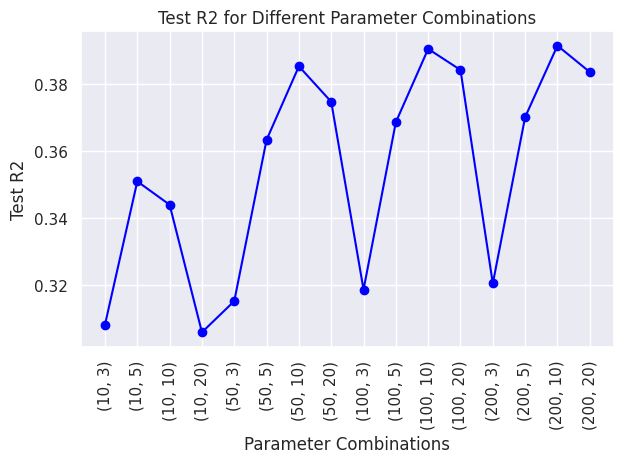

In [107]:
fig, ax = plt.subplots()

# Convert parameters to strings for labeling
parameter_labels = [str(param) for param in parameters]

ax.plot(parameter_labels, test_R2s, marker='o', linestyle='-', color='blue')
ax.set_ylabel('Test R2')
ax.set_xlabel('Parameter Combinations')
ax.set_title('Test R2 for Different Parameter Combinations')
ax.set_xticks(parameter_labels)
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

Forest with 200 estimators and 10 depth seems most appropriate

"Only" about 40% explained variance

In [108]:
rfc = ensemble.RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42) #how many trees should we fit?
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.3914112350267063

### 3.2 Importances

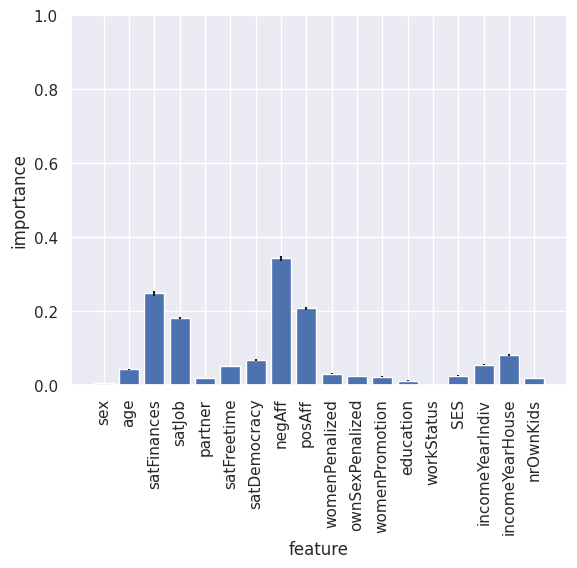

In [109]:
p_importances = permutation_importance(rfc, x_train, y_train, n_repeats=10, n_jobs=-1, random_state=42) # do also with training data
#plt.barh(list(df_x.columns), #horizontal, taking the column names as labels directly
plt.bar(['sex','age', 'satFinances', 'satJob', 'partner', 'satFreetime', 'satDemocracy', 'negAff', 'posAff', 'womenPenalized', 'ownSexPenalized', 'womenPromotion', 'education', 'workStatus', 'SES', 'incomeYearIndiv', 'incomeYearHouse', 'nrOwnKids'],
        p_importances.importances_mean,
        yerr=p_importances.importances_std)
plt.xticks(rotation='vertical')
plt.xlabel('feature')
plt.ylabel('importance')
plt.ylim(0, 1);

* Satisfaction with Finances and Job
* Positive and negative Emotions

### 3.3 Prediction Assessment

[]

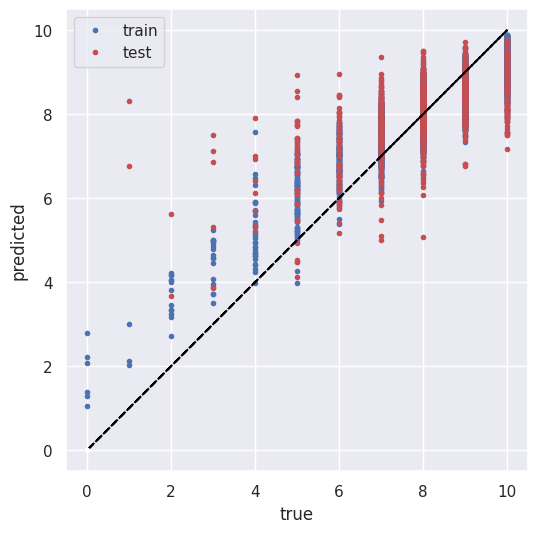

In [110]:
y_p_train = rfc.predict(x_train)
y_p_test = rfc.predict(x_test)


# 4. plot y vs predicted y for test and train parts
plt.figure(figsize=(6,6))
plt.plot(y_train, y_p_train, 'b.', label='train')
plt.plot(y_test, y_p_test, 'r.', label='test')
plt.plot(y_train,y_train,'--',color='black')

plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

does not seem ideal

## 4. How can the features of the Panel data be reduced?


### 4.1 PCA

In [112]:
#standardize?
 # for minmax scaling "MinMaxScaler"
#df_pca = df[['satLife','sex','age', 'satFinances', 'satJob', 'satRelat', 'happyPartner', 'satFreetime', 'satDemocracy', 'negAff', 'posAff', 'womenPenalized', 'ownSexPenalized', 'womenPromotion', 'education', 'workStatus', 'SES', 'nrOwnKids']]
df_pca = scale.fit_transform(df_X)

np.set_printoptions(precision = None, suppress = True) # define output, check out
pca=PCA()
pca.fit(df_pca)
component_scores = pca.fit_transform(df_pca)

print(df_pca)
print(pca.explained_variance_ratio_)

[[-1.04801067  1.00227335 -1.07814593 ...  1.30472942  0.14361475
   0.51055373]
 [ 0.95418876 -1.33935546 -2.0567707  ... -1.18397951 -0.87264955
  -1.08142158]
 [ 0.95418876  0.15077197  0.87910361 ... -0.54249333 -0.25603975
   0.51055373]
 ...
 [-1.04801067 -1.12648011  1.36841599 ...  0.12473812  1.60806302
  -1.08142158]
 [-1.04801067 -0.98456322  0.38979122 ...  0.11401092  1.60806302
  -1.08142158]
 [ 0.95418876 -1.55223081 -0.09952116 ... -0.66907421 -1.3122695
  -1.08142158]]
[0.1713518  0.12573679 0.10744302 0.08773427 0.0652206  0.06015755
 0.05161991 0.04773476 0.04434498 0.04027981 0.03603306 0.0353384
 0.03103873 0.03082708 0.02565801 0.02294045 0.01654077 0.        ]


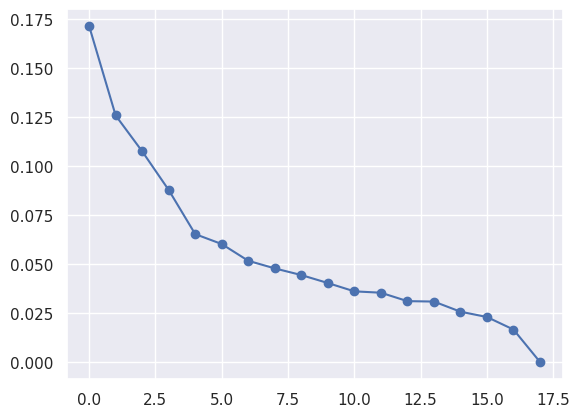

In [113]:
plt.plot(pca.explained_variance_ratio_,'-o') # cumulative plot / random distr plot

Let's take the first five components

In [114]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_pca_out = pd.DataFrame(pca.components_.transpose(),
                  columns = [f'V_{i+1}' for i in range(len(df_X_columns))],
                  index=df_X_columns)
df_pca_out




,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15,V_16,V_17,V_18
sex,0.19210,0.04022,-0.35317,-0.17424,-0.59688,-0.13877,0.12847,0.01999,0.04659,-0.02413,-0.24394,0.19935,0.23653,0.03975,-0.36356,-0.12439,0.32678,0.00000
age,-0.25422,-0.01822,-0.33018,0.45497,0.02362,0.25754,0.14661,0.10928,0.17508,0.07690,-0.04424,-0.09522,0.05814,-0.08063,-0.48923,-0.05847,-0.46740,0.00000
satFinances,-0.34128,-0.08338,-0.10039,-0.20769,-0.23218,0.20854,-0.03689,-0.39851,0.14252,-0.03331,-0.52223,-0.39132,-0.09181,-0.15142,0.27596,0.09088,-0.05240,-0.00000
satJob,-0.23506,-0.26198,-0.22968,-0.19421,-0.05902,0.14641,0.16503,-0.07275,-0.18107,-0.70783,0.43174,-0.01802,0.02839,0.06015,0.01431,-0.05351,-0.01289,-0.00000
partner,-0.21018,0.08381,-0.18359,0.27479,-0.16617,-0.41499,-0.37496,0.01073,-0.60716,0.03753,0.05282,-0.30635,-0.08239,-0.11056,-0.06912,0.06569,0.06518,-0.00000
satFreetime,-0.11197,-0.32513,-0.26061,-0.12730,-0.04418,0.42829,0.05352,-0.04143,-0.28756,0.61946,0.26285,0.10538,-0.05659,0.09510,0.09253,0.02409,0.19916,0.00000
satDemocracy,-0.20672,0.04820,0.03295,-0.31404,-0.13890,0.20974,-0.63943,0.52228,0.27526,-0.02819,0.10051,-0.05925,-0.06888,0.01222,-0.10238,-0.06663,0.01752,0.00000
negAff,0.29870,0.23616,0.05958,0.21503,-0.23774,0.40361,-0.12008,-0.06856,-0.06966,-0.08343,0.20372,0.03664,0.23837,-0.64534,0.19560,0.00374,0.02144,-0.00000
posAff,-0.23774,-0.21493,-0.17723,-0.27100,0.20101,-0.44255,0.17363,0.18577,0.18133,0.17356,0.09459,0.05698,0.23149,-0.59368,0.09538,0.01431,-0.03119,0.00000
womenPenalized,0.07837,0.35745,-0.40788,-0.12239,0.37526,0.05010,-0.06528,-0.09970,-0.05452,-0.01170,-0.08124,-0.01541,-0.16721,-0.04796,0.09899,-0.68688,0.07350,-0.00000


In [115]:
df_pca_out2 = df_pca_out[['V_1','V_2','V_3','V_4', 'V_5']].sort_values('V_1', ascending = False)
df_pca_out2

,V_1,V_2,V_3,V_4,V_5
negAff,0.29870,0.23616,0.05958,0.21503,-0.23774
ownSexPenalized,0.22433,0.30013,-0.27118,-0.07694,-0.23624
sex,0.19210,0.04022,-0.35317,-0.17424,-0.59688
womenPromotion,0.08381,0.32035,-0.39191,-0.22489,0.36033
womenPenalized,0.07837,0.35745,-0.40788,-0.12239,0.37526
workStatus,0.00000,-0.00000,0.00000,0.00000,-0.00000
satFreetime,-0.11197,-0.32513,-0.26061,-0.12730,-0.04418
satDemocracy,-0.20672,0.04820,0.03295,-0.31404,-0.13890
partner,-0.21018,0.08381,-0.18359,0.27479,-0.16617
nrOwnKids,-0.21395,-0.01225,-0.31117,0.49017,-0.08392


### 4.2 Interpretation of Components

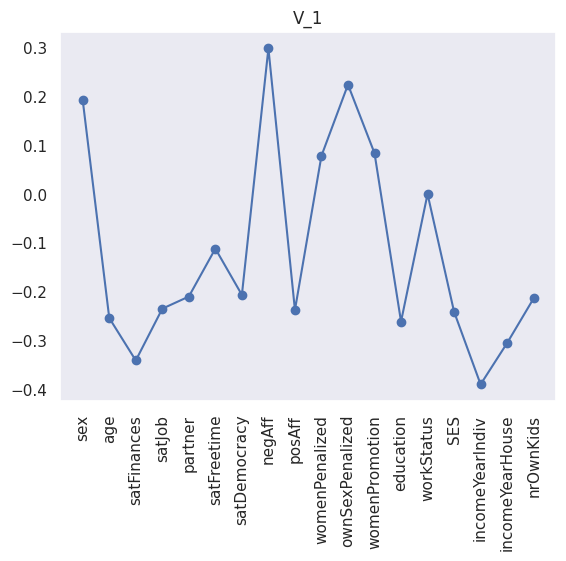

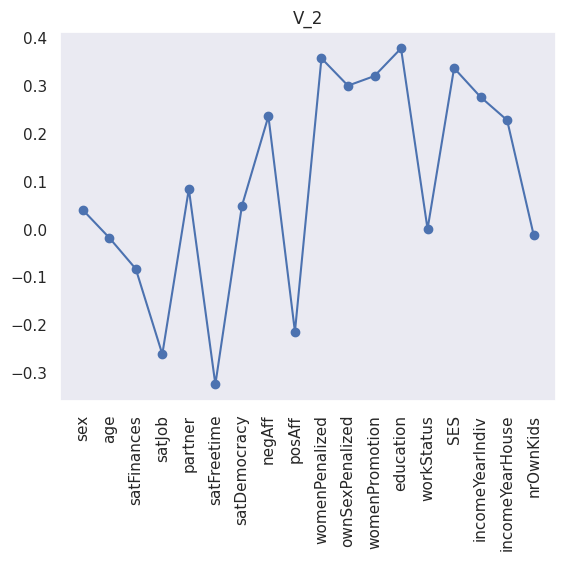

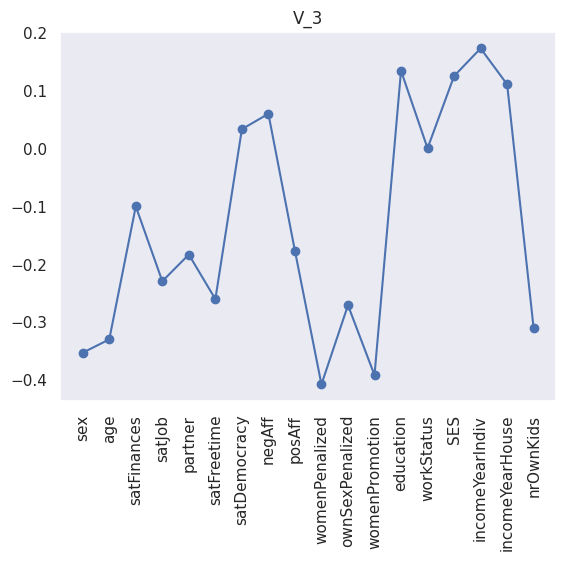

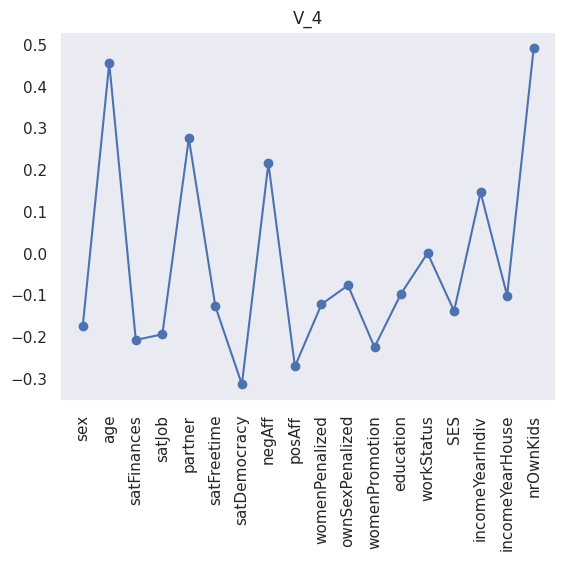

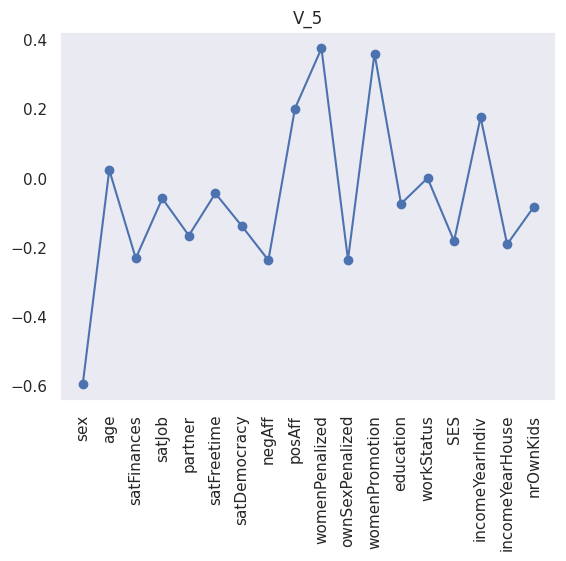

In [116]:
for vector in ['V_1','V_2','V_3','V_4', 'V_5']:
    plt.figure()
    plt.title(vector)
    plt.plot(np.arange(len(df_X_columns)),list(df_pca_out[vector]),'-o')
    _=plt.xticks(np.arange(len(df_X_columns)),df_X_columns, rotation=90)
    plt.grid()

Interpretation of Components:

* C1: Female grumpy low income
* C2: high SES grumpy (not happy with freetime)
* C3: young male low gender attitudes
* C4: Age (and grumpy)
* C5: Male with higher gender attitudes (and positive emotions)

### 4.3 Predict Life Satisfaction with Component Scores

In [117]:
# component score data

pca_score_data = pd.DataFrame(component_scores, columns=[f'V_{i+1}' for i in range(18)])[['V_1','V_2','V_3','V_4', 'V_5']].copy()
print(pca_score_data)


np_pca_X = scale.fit_transform(pca_score_data).copy()

# train test split
x_train, x_test, y_train, y_test = train_test_split(np_pca_X, np_Y, test_size=0.2, random_state = 42)

          V_1      V_2      V_3      V_4      V_5
0     0.17536  2.28730  2.85944  2.99473 -0.94888
1     3.92558  0.22962  0.61041  0.36133 -0.22276
2    -0.03333 -0.03495 -1.37459 -0.54018 -1.11176
3     1.36298 -1.20349 -2.84573  0.31215  0.34412
4    -0.76516 -2.05536 -1.27073  1.06143  2.05714
...       ...      ...      ...      ...      ...
6013  1.17547  0.90257  1.07289 -0.48500  0.64153
6014 -2.60817  0.41293  0.47783 -2.59715  0.70073
6015  0.15524  1.67540  2.46455 -1.52171 -0.85879
6016 -0.47249  0.08591  3.60765 -0.88838 -0.62085
6017  2.98873  0.99732 -0.47968 -0.35123 -0.52759

[6018 rows x 5 columns]


In [118]:
rfc = ensemble.RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42) #how many trees should we fit?
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.3187107755814972

[]

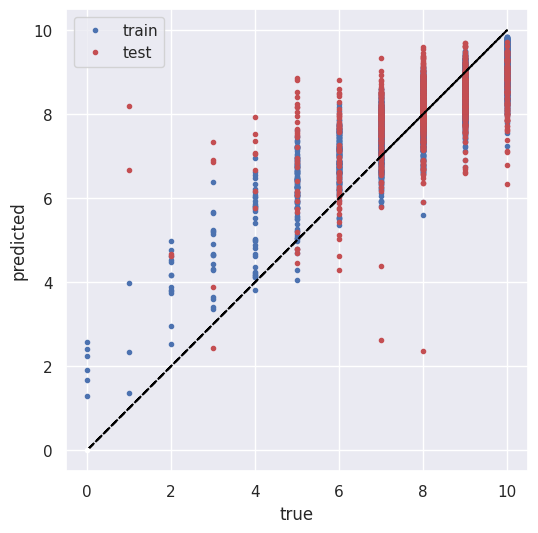

In [119]:
y_p_train = rfc.predict(x_train)
y_p_test = rfc.predict(x_test)


# 4. plot y vs predicted y for test and train parts
plt.figure(figsize=(6,6))
plt.plot(y_train, y_p_train, 'b.', label='train')
plt.plot(y_test, y_p_test, 'r.', label='test')
plt.plot(y_train,y_train,'--',color='black')

plt.plot([0], [0], 'w.')  # dummy to have origin
plt.xlabel('true')
plt.ylabel('predicted')
plt.gca().set_aspect('equal')
plt.legend()
plt.plot()

Hmmm it's actually worse...

## 5. What Clusters of Individuals can be found in the Panel Data?

### 5.1 Clustering with Raw Data

Select data

In [121]:
clu_np = np_Xs.copy()
#clu_np = clu.to_numpy().astype(np.float32)
print(clu_np)


[[-1.0480106   1.0022733  -1.078146   ...  1.3047295   0.14361475
   0.5105537 ]
 [ 0.95418876 -1.3393555  -2.0567706  ... -1.1839795  -0.87264955
  -1.0814215 ]
 [ 0.95418876  0.15077198  0.8791036  ... -0.54249334 -0.25603977
   0.5105537 ]
 ...
 [-1.0480106  -1.1264801   1.368416   ...  0.12473812  1.6080631
  -1.0814215 ]
 [-1.0480106  -0.98456323  0.38979122 ...  0.11401093  1.6080631
  -1.0814215 ]
 [ 0.95418876 -1.5522308  -0.09952116 ... -0.66907424 -1.3122694
  -1.0814215 ]]


Determine number of Clusters

In [122]:
plt.figure()
scores=[]
for itrial in range(2,15):
    print('Number of clusters considered: ',itrial)
    clusterer = KMeans(n_clusters=itrial, random_state=10)
    cluster_labels = clusterer.fit_predict(clu_np)
    score=silhouette_score(clu_np,cluster_labels)
    scores.append(score)



Number of clusters considered:  2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 640x480 with 0 Axes>

[0.103014, 0.095842764, 0.09898855, 0.091582045, 0.08839479, 0.08454377, 0.07771274, 0.07580031, 0.07346598, 0.076081924, 0.07457538, 0.0696979, 0.06958269]


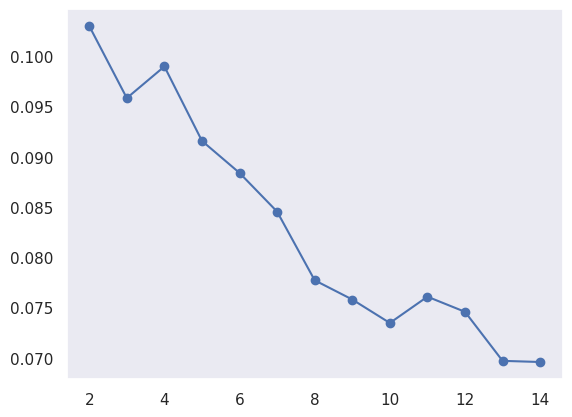

In [123]:
print(scores)

plt.grid()
plt.plot(np.arange(len(scores))+2,np.array(scores),'-o')

2 Clusters are best --> Does not seem to be working properly

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


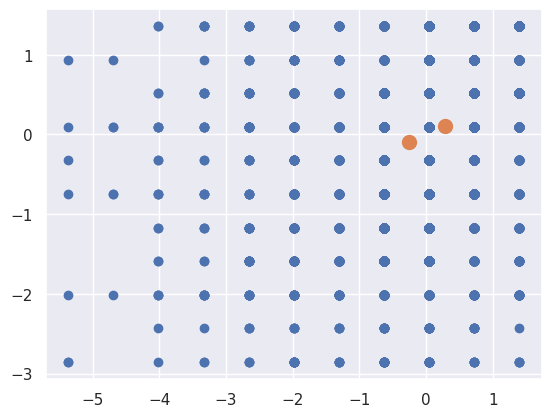

In [124]:
clusterer = KMeans(n_clusters=2, random_state=10)
clusterer.fit(clu_np)
plt.plot(clu_np[:,3],clu_np[:,5],'o')
plt.plot(clusterer.cluster_centers_[:,3],clusterer.cluster_centers_[:,5],'o',markersize=10)
plt.show()

### 5.2 Clustering with component scores

In [125]:
plt.figure()
scores=[]
for itrial in range(2,15):
    print('Number of clusters considered: ',itrial)
    clusterer = KMeans(n_clusters=itrial, random_state=10)
    cluster_labels = clusterer.fit_predict(np_pca_X)
    score=silhouette_score(np_pca_X,cluster_labels)
    scores.append(score)

Number of clusters considered:  2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  9


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of clusters considered:  14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 640x480 with 0 Axes>

Determine number of clusters

[0.171261001999568, 0.17294028276420403, 0.17401001846142955, 0.179635622503683, 0.1804811866042229, 0.1739422957245539, 0.17163048133834122, 0.16977800660977377, 0.16918748677074305, 0.16411534679753015, 0.1665833538363604, 0.1640649036605564, 0.16363059695349919]


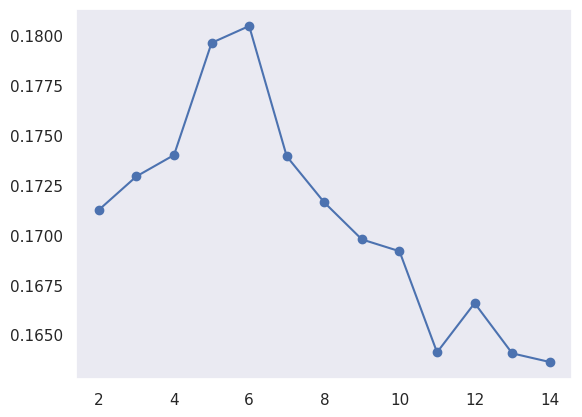

In [126]:
print(scores)

plt.grid()
plt.plot(np.arange(len(scores))+2,np.array(scores),'-o')

Now this looks better! Let's take 6 Clusters



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


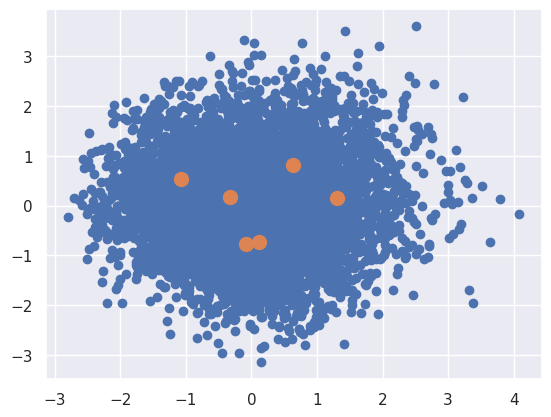

In [127]:
clusterer = KMeans(n_clusters=6, random_state=10)
clusterer.fit(np_pca_X)
plt.plot(np_pca_X[:,0],np_pca_X[:,2],'o')
plt.plot(clusterer.cluster_centers_[:,0],clusterer.cluster_centers_[:,2],'o',markersize=10)
plt.show()

#### Interpretation of Clusters

Very vague!!!!

In [128]:
clusterer.cluster_centers_[:,:]

array([[ 0.11256652, -0.66889081, -0.73578   ,  0.66959961,  0.87962919],
       [-0.32670214, -1.02566727,  0.17522554,  0.41104025, -1.12264668],
       [-0.07639371,  0.57203765, -0.77607968, -0.62166515, -0.55831461],
       [ 1.30361382,  0.88081278,  0.15340669,  0.72987555, -0.33806591],
       [-1.07592516,  0.60343633,  0.52819525,  0.21868294,  0.47782418],
       [ 0.63816882, -0.56835283,  0.81796432, -1.06512762,  0.45072444]])

Clusters:

* Cluster 1: older (males?) with rather positive attitudes
* Cluster 2: females with low SES / education
* Cluster 3: younger females
* Cluster 4: grumpy females
* Cluster 5: higher SES (young) males
* Cluster 6: younger people


Component Reminder:

* C1: Female grumpy low income
* C2: high SES grumpy (not happy with freetime)
* C3: young male low gender attitudes
* C4: Age (and grumpy)
* C5: Male with higher gender attitudes (and positive emotions)

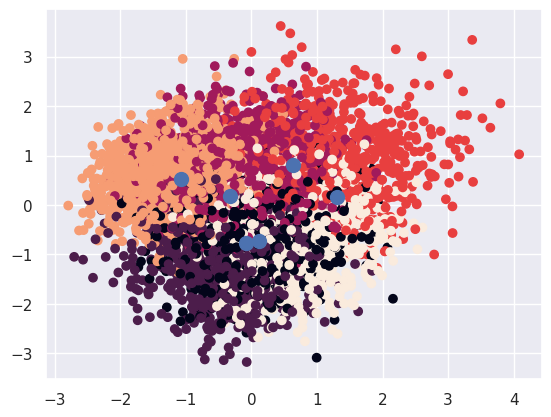

array([3, 3, 2, ..., 5, 5, 3], dtype=int32)

In [93]:
cluster_labels=clusterer.predict(np_pca_X)
plt.scatter(np_pca_X[:,0],np_pca_X[:,1],c=cluster_labels)
plt.plot(clusterer.cluster_centers_[:,0],clusterer.cluster_centers_[:,2],'o',markersize=10)
plt.show()

cluster_labels